In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Run voom normalisation for both drug and DMSO data separately

In [2]:
voom_pb_data = pd.read_csv("/home/nilabjab/cancer_dependency_project_nilabja/cancer_dependency_project/Approach3_Latent_factor/Tahoe_analysis/Erlotinib_vs_DMSO_voom_normalised_tahoe.csv")
dmso_only = voom_pb_data[voom_pb_data['DRUG'] == 'DMSO']
dmso_only.set_index('CELLLINE', inplace=True)
dmso_only.drop(columns=['DRUG'], inplace=True)
dmso_only.head()

/tmp/ipykernel_2671152/4015531519.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dmso_only.drop(columns=['DRUG'], inplace=True)


,TSPAN6,TNMD,DPM1,SCYL3,C1ORF112,FGR,CFH,FUCA2,GCLC,NFYA,...,POLGARF,ENSG00000291308,LY6S,ENSG00000291310,ENSG00000291312,ENSG00000291313,ENSG00000291314,ENSG00000291315,TMEM276ZFTRAF1,TMEM276
CELLLINE,,,,,,,,,,,,,,,,,,,,,
A-172,0.646315,-2.813117,6.441912,3.756739,4.808935,-0.491189,1.941771,4.764312,5.169877,5.361809,...,-0.491189,-2.813117,-2.813117,-2.813117,-2.813117,-2.813117,-2.813117,-2.813117,-1.228154,1.579201
A-427,3.317673,-3.368827,6.861193,3.791044,5.069965,-3.368827,0.090604,5.564863,5.558951,5.914261,...,-1.046899,-3.368827,-3.368827,-3.368827,-3.368827,-3.368827,-3.368827,-3.368827,-1.783865,1.988725
A498,3.200580,-4.267026,7.546355,3.232820,4.422972,-4.267026,6.195477,5.492863,6.794346,5.570602,...,-1.945098,-4.267026,-2.682063,-4.267026,-4.267026,-4.267026,-4.267026,-4.267026,-1.097101,2.142365
A549,3.246793,-3.196150,6.703207,2.585209,4.425902,-1.611188,2.585209,4.775393,6.718235,5.121262,...,-0.874222,-3.196150,-3.196150,-3.196150,-3.196150,-3.196150,-3.196150,-3.196150,-0.874222,2.585209
AN3 CA,5.156940,-0.269325,6.444920,2.538030,4.485562,-0.269325,2.538030,5.920499,6.949843,6.890546,...,1.315637,-0.269325,-0.269325,-0.269325,-0.269325,-0.269325,-0.269325,-0.269325,-0.269325,2.538030


In [3]:
# clean the cell line names
dmso_voom = dmso_only.copy()
dmso_voom.index = dmso_voom.index.str.replace(' ', '')
dmso_voom.head()

,TSPAN6,TNMD,DPM1,SCYL3,C1ORF112,FGR,CFH,FUCA2,GCLC,NFYA,...,POLGARF,ENSG00000291308,LY6S,ENSG00000291310,ENSG00000291312,ENSG00000291313,ENSG00000291314,ENSG00000291315,TMEM276ZFTRAF1,TMEM276
CELLLINE,,,,,,,,,,,,,,,,,,,,,
A-172,0.646315,-2.813117,6.441912,3.756739,4.808935,-0.491189,1.941771,4.764312,5.169877,5.361809,...,-0.491189,-2.813117,-2.813117,-2.813117,-2.813117,-2.813117,-2.813117,-2.813117,-1.228154,1.579201
A-427,3.317673,-3.368827,6.861193,3.791044,5.069965,-3.368827,0.090604,5.564863,5.558951,5.914261,...,-1.046899,-3.368827,-3.368827,-3.368827,-3.368827,-3.368827,-3.368827,-3.368827,-1.783865,1.988725
A498,3.200580,-4.267026,7.546355,3.232820,4.422972,-4.267026,6.195477,5.492863,6.794346,5.570602,...,-1.945098,-4.267026,-2.682063,-4.267026,-4.267026,-4.267026,-4.267026,-4.267026,-1.097101,2.142365
A549,3.246793,-3.196150,6.703207,2.585209,4.425902,-1.611188,2.585209,4.775393,6.718235,5.121262,...,-0.874222,-3.196150,-3.196150,-3.196150,-3.196150,-3.196150,-3.196150,-3.196150,-0.874222,2.585209
AN3CA,5.156940,-0.269325,6.444920,2.538030,4.485562,-0.269325,2.538030,5.920499,6.949843,6.890546,...,1.315637,-0.269325,-0.269325,-0.269325,-0.269325,-0.269325,-0.269325,-0.269325,-0.269325,2.538030


In [4]:
gene_weights = pd.read_csv('../data_files/L40_gene_weights_final.csv', header = 0, index_col = 0)

In [5]:
common_genes = np.intersect1d(dmso_voom.columns, gene_weights.index)
print(len(common_genes))

197


In [6]:
np.setdiff1d(gene_weights.index, dmso_voom.columns)

array(['CTGF', 'SEPT7P6', 'TMEM8A'], dtype=object)

In [7]:
'CCN2' in dmso_voom.columns

True

In [8]:
'ENSG00000241007' in dmso_voom.columns

False

In [9]:
'PGAP' in dmso_voom.columns

False

In [10]:
dmso_voom.rename(columns={'CCN2': 'CTGF', 'PGAP6': 'TMEM8A'}, inplace=True)

In [11]:
dmso_voom['CTGF'].describe()

count    50.000000
mean      3.998416
std       1.803484
min       0.907770
25%       2.579846
50%       4.099343
75%       5.238070
max       8.163041
Name: CTGF, dtype: float64

In [12]:
dmso_voom['TMEM8A'].describe()

count    50.000000
mean      3.489540
std       0.722148
min       2.106962
25%       2.923208
50%       3.460826
75%       4.042420
max       4.965364
Name: TMEM8A, dtype: float64

In [13]:
gene_weights.loc['TMEM8A']

EGFR_IC50_weight          0.451384
EGFR_dep_weight           0.015025
combined_weight           0.466409
scaled_combined_weight    1.322842
Name: TMEM8A, dtype: float64

In [14]:
common_genes = np.intersect1d(dmso_voom.columns, gene_weights.index)
dmso_voom_f = dmso_voom[common_genes]
dmso_voom_f.shape

(50, 199)

In [15]:
weighted_df = pd.DataFrame(index = dmso_voom_f.index, columns = common_genes)
for gene in common_genes:
  g_weight = gene_weights.loc[gene, 'scaled_combined_weight']
  weighted_df[gene] = dmso_voom_f[gene] * g_weight
  
weighted_df.head()

,ACE2,ADAP1,AGPAT1,AGR2,AKT1S1,ALS2CL,ANKRD52,ANKS3,ANO1,ANXA8,...,UGT1A8,UPK2,UPK3B,VCAM1,WFS1,YWHABP2,ZNF385C,ZNF668,ZNF750,ZNF804A
CELLLINE,,,,,,,,,,,,,,,,,,,,,
A-172,0.019004,-0.405937,-6.517026,-1.154733,3.044212,-0.539475,0.903049,-3.375502,2.054816,-0.761978,...,-0.241403,-0.002839,0.002815,-0.915981,4.159774,0.570676,-0.087240,-0.706476,0.002671,0.214912
A-427,0.130338,-0.438185,-7.917192,-0.899238,3.235976,-0.447315,0.898283,-3.188197,1.883469,0.390106,...,-0.205776,0.504327,0.511563,0.041170,2.654750,0.683409,0.463289,-1.029543,0.003053,0.411897
A498,0.056474,-0.145290,-6.390107,-0.862111,3.009851,-0.283630,0.991620,-3.728634,1.740429,1.590022,...,-0.003754,0.240395,-0.812966,-1.837000,2.863690,0.865620,-0.259253,-1.082268,0.004391,0.103279
A549,0.033823,-0.165274,-5.556467,-1.331794,2.977062,-0.380721,0.807542,-3.456838,1.978474,-0.098107,...,-0.171835,1.220189,-0.648635,-0.054496,1.534969,0.648380,0.295159,-0.808636,0.004753,0.102359
AN3CA,-0.050901,-0.288473,-7.745861,-1.393395,2.263458,0.044665,0.909534,-3.352509,2.830142,0.100359,...,-0.052938,1.011424,-1.002997,-0.272321,3.333658,0.054636,-0.047835,-1.009990,-0.007153,0.214323


In [16]:
tahoe_benefit_scores = weighted_df.sum(axis = 1)
tahoe_benefit_scores

CELLLINE
A-172          7.804967
A-427         14.036827
A498          -4.239121
A549           3.847927
AN3CA          6.053035
AsPC-1       -16.429022
BT-474         5.630270
C-33A          6.072531
C32            5.441464
CFPAC-1        6.177612
CHP-212       11.809192
COLO205      -41.816682
H4             8.303560
HCT15          7.990565
HEC-1-A        4.776344
HOP62         -3.828525
HS-578T       11.434029
HT-29          1.900225
HepG2/C3A     33.932237
Hs766T        -4.524054
J82          -13.209601
KATOIII       -5.390882
LOX-IMVI      -5.685600
LS180        -27.781073
LoVo         -23.043467
MIAPaCa-2     22.115531
NCI-H1573     10.492685
NCI-H1792    -42.256864
NCI-H2030     26.718887
NCI-H2122      3.359551
NCI-H23       19.408215
NCI-H2347     11.347328
NCI-H460     -12.835252
NCI-H596      13.903672
NCI-H661      13.563592
PANC-1        -2.160598
Panc03.27      3.800065
RKO           14.719893
RPMI-7951      4.771191
SHP-77       -21.653583
SK-MEL-2       0.516313
SNU-1  

In [17]:
tahoe_score_df = pd.DataFrame(index = dmso_voom_f.index)
tahoe_score_df['benefit_score'] = tahoe_benefit_scores
tahoe_score_df['score_cat'] = np.where(tahoe_score_df['benefit_score'] > np.median(tahoe_score_df['benefit_score']),
                                            'high score', 'low score')
tahoe_score_df.head()

,benefit_score,score_cat
CELLLINE,,
A-172,7.804967,high score
A-427,14.036827,high score
A498,-4.239121,low score
A549,3.847927,low score
AN3CA,6.053035,high score


Given the above scores, compute the transcriptome shift

In [18]:
erlotinib_pb = pd.read_csv('../data_files/tahoe_erlotinib_pseudobulk.csv', header = 0, index_col=0)
erlotinib_pb.head()

,7SK,A1BG,A1BG-AS1,A1CF,A2M,A2ML1,A2ML1-AS1,A2MP1,A3GALT2,A4GALT,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
pb_id,,,,,,,,,,,,,,,,,,,,,
plate7_A-172,112.0,56.0,81.0,0.0,3.0,2.0,7.0,18.0,0.0,19.0,...,62.0,14.0,19.0,19.0,384.0,63.0,268.0,108.0,301.0,218.0
plate7_A-427,57.0,35.0,29.0,1.0,4.0,1.0,20.0,31.0,0.0,6.0,...,111.0,29.0,11.0,27.0,436.0,194.0,297.0,93.0,271.0,414.0
plate7_A498,265.0,3.0,6.0,11.0,8.0,7.0,12.0,36.0,0.0,126.0,...,196.0,71.0,20.0,34.0,524.0,220.0,335.0,420.0,918.0,927.0
plate7_A549,69.0,13.0,33.0,0.0,1.0,3.0,11.0,25.0,0.0,25.0,...,116.0,16.0,4.0,20.0,211.0,57.0,194.0,100.0,435.0,272.0
plate7_AN3 CA,20.0,1.0,1.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,...,16.0,7.0,3.0,4.0,31.0,0.0,38.0,22.0,44.0,73.0


In [19]:
metadata = pd.DataFrame(index = erlotinib_pb.index)
metadata['plate_id'] = erlotinib_pb.index.str.split('_').str[0]
metadata['cell_line'] = erlotinib_pb.index.str.split('_').str[1]

In [20]:
import rpy2.robjects as ro
from rpy2.robjects import pandas2ri
pandas2ri.activate()

# If needed, import R libraries
ro.r('library(limma)')
ro.r('library(edgeR)')

In [21]:
# Example: assume `counts_df` is your pandas DataFrame with raw counts (genes x samples)
# Convert to R
ro.globalenv['counts'] = pandas2ri.py2rpy(erlotinib_pb.T)
ro.globalenv['metadata'] = pandas2ri.py2rpy(metadata)

# Run voom pipeline in R
# we didnot find any batch effect in drug-treated data
# also as different conc were used in different plates\
# batch correction is not needed
ro.r('''
library(edgeR)
library(limma)
dge <- DGEList(counts = counts)
dge <- calcNormFactors(dge)
design <- model.matrix(~ 0 + factor(metadata$plate_id) + factor(metadata$cell_line))
v <- voom(dge, design, plot=F)
voom_expr <- v$E
''')

# Pull back the normalized expression matrix to Python
voom_expr = pandas2ri.rpy2py(ro.r('as.data.frame(voom_expr)'))

In [22]:
voom_expr.head()

,plate7_A-172,plate7_A-427,plate7_A498,plate7_A549,plate7_AN3 CA,plate7_AsPC-1,plate7_BT-474,plate7_C-33 A,plate7_C32,plate7_CFPAC-1,...,plate9_SK-MEL-2,plate9_SNU-1,plate9_SNU-423,plate9_SW 1088,plate9_SW 1271,plate9_SW 900,plate9_SW1417,plate9_SW48,plate9_SW480,plate9_hTERT-HPNE
7SK,5.197652,3.950309,5.275292,4.476051,5.343776,6.356873,6.411348,4.995484,7.245747,5.976715,...,7.147856,6.905985,6.667334,6.915659,6.594962,7.033103,7.377573,6.833961,5.900886,6.799829
A1BG,4.204050,3.254566,-0.969922,2.111997,1.571186,-2.209181,0.345259,3.356583,1.021209,-1.372013,...,1.902852,-0.609715,-1.281033,3.215219,3.631487,1.699202,-0.325177,1.656043,-1.101367,3.161228
A1BG-AS1,4.732599,2.987462,-0.076837,3.423199,1.571186,-0.624218,1.567651,3.356583,3.405873,-0.149621,...,3.983772,0.975248,-1.281033,3.215219,1.309559,2.921594,0.411789,-0.665885,-1.838332,3.161228
A1CF,-2.616129,-1.310219,0.746285,-2.642890,-0.013776,4.733334,1.082224,1.034655,-2.148716,-0.635048,...,-0.212626,-0.609715,-1.281033,3.215219,1.309559,0.114240,1.259786,0.919078,3.234917,2.509151
A2M,0.191226,0.274744,0.310186,-1.057928,-0.013776,0.112747,0.345259,1.686731,8.472420,-0.635048,...,5.950605,-0.609715,2.178398,3.215219,2.894522,0.114240,1.549293,2.793547,0.036137,-0.298203


In [23]:
erlotinib_pb_voom = voom_expr.T

In [24]:
erlotinib_pb_voom.to_csv('../data_files/erlotinib_tahoe_voom.csv', index=True)

In [25]:
plate_ids = ['plate7', 'plate8', 'plate9']
conc_cat = ['0.05', '0.5', '5']
plate_conc_map = dict(zip(plate_ids, conc_cat))
plate_conc_map

{'plate7': '0.05', 'plate8': '0.5', 'plate9': '5'}

In [26]:
dmso_scaled = (dmso_only - dmso_only.mean()) / dmso_only.std()
common_genes2 = list(set(erlotinib_pb_voom.columns) & set(dmso_scaled.columns))
dmso_scaled_exp = dmso_scaled[common_genes2]
erlotinib_pb_voom = erlotinib_pb_voom[common_genes2]
dmso_scaled_exp.shape, erlotinib_pb_voom.shape

((50, 17667), (150, 17667))

In [27]:
delta_expression_df = pd.DataFrame(index=tahoe_score_df.index, columns=plate_ids)
for plate_name in plate_ids:
  conc = plate_conc_map[plate_name]
  mask = erlotinib_pb_voom.index.str.contains(plate_name)
  drug_df = erlotinib_pb_voom.loc[mask]
  drug_df = (drug_df - drug_df.mean()) / drug_df.std()
  drug_df['cell_line'] = drug_df.index.str.split('_').str[1]
  drug_df.set_index('cell_line', inplace=True, drop = True)
  print(drug_df.shape)
  dmso_scaled_exp = dmso_scaled_exp[drug_df.columns]
  delta_expression = drug_df.values - dmso_scaled_exp.values
  response_strengths = np.linalg.norm(delta_expression, axis=1)
  delta_expression_df[plate_name] = response_strengths
delta_expression_df.head()

(50, 17667)
(50, 17667)
(50, 17667)


,plate7,plate8,plate9
CELLLINE,,,
A-172,69.270840,66.915592,78.420289
A-427,65.228140,60.950155,80.304270
A498,55.620062,47.814402,74.807102
A549,66.708539,63.496308,76.731203
AN3CA,123.700175,122.643297,133.199938


In [28]:
merged_tahoe_df = pd.concat([tahoe_score_df, delta_expression_df], axis = 1)

In [29]:
merged_tahoe_df.head()

,benefit_score,score_cat,plate7,plate8,plate9
CELLLINE,,,,,
A-172,7.804967,high score,69.270840,66.915592,78.420289
A-427,14.036827,high score,65.228140,60.950155,80.304270
A498,-4.239121,low score,55.620062,47.814402,74.807102
A549,3.847927,low score,66.708539,63.496308,76.731203
AN3CA,6.053035,high score,123.700175,122.643297,133.199938


In [30]:
merged_tahoe_df_long = pd.melt(
    merged_tahoe_df.reset_index(), 
    id_vars=['CELLLINE', 'benefit_score', 'score_cat'], 
    var_name='plate', 
    value_name='response_strength'
)

In [31]:
merged_tahoe_df_long.head()

,CELLLINE,benefit_score,score_cat,plate,response_strength
0,A-172,7.804967,high score,plate7,69.270840
1,A-427,14.036827,high score,plate7,65.228140
2,A498,-4.239121,low score,plate7,55.620062
3,A549,3.847927,low score,plate7,66.708539
4,AN3CA,6.053035,high score,plate7,123.700175


In [32]:
merged_tahoe_df_long['log_val'] = np.log10(merged_tahoe_df_long['response_strength'])

In [33]:
merged_tahoe_df_long.head()

,CELLLINE,benefit_score,score_cat,plate,response_strength,log_val
0,A-172,7.804967,high score,plate7,69.270840,1.840550
1,A-427,14.036827,high score,plate7,65.228140,1.814435
2,A498,-4.239121,low score,plate7,55.620062,1.745231
3,A549,3.847927,low score,plate7,66.708539,1.824181
4,AN3CA,6.053035,high score,plate7,123.700175,2.092370


In [34]:
merged_tahoe_df_long['plate'].value_counts()

plate
plate7    50
plate8    50
plate9    50
Name: count, dtype: int64

<Axes: xlabel='plate', ylabel='log_val'>

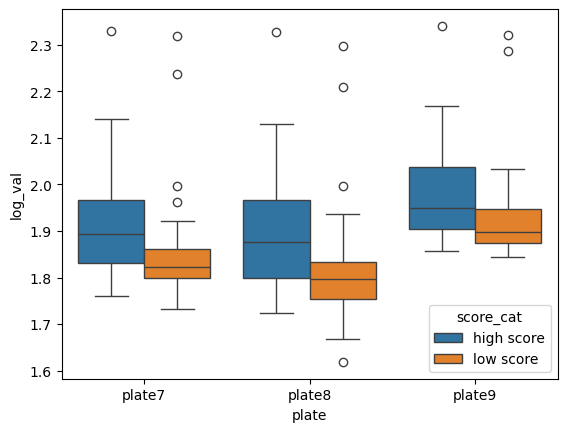

In [35]:
sns.boxplot(data=merged_tahoe_df_long, x = 'plate', y = 'log_val', hue = 'score_cat')

In [36]:
merged_tahoe_df_long.head()

,CELLLINE,benefit_score,score_cat,plate,response_strength,log_val
0,A-172,7.804967,high score,plate7,69.270840,1.840550
1,A-427,14.036827,high score,plate7,65.228140,1.814435
2,A498,-4.239121,low score,plate7,55.620062,1.745231
3,A549,3.847927,low score,plate7,66.708539,1.824181
4,AN3CA,6.053035,high score,plate7,123.700175,2.092370


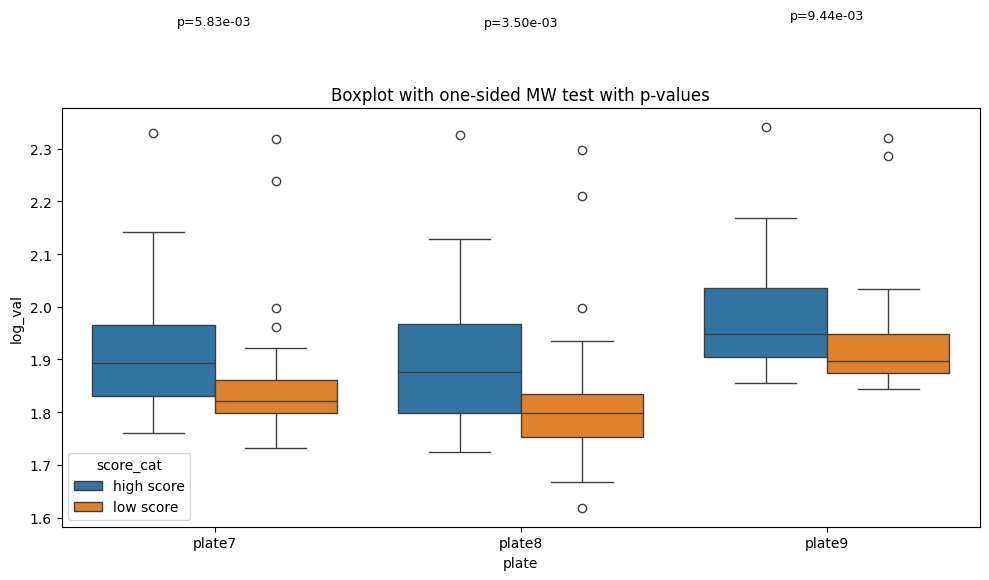

In [37]:
from scipy.stats import mannwhitneyu

# Initialize plot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=merged_tahoe_df_long, x='plate', y='log_val', hue='score_cat')

# Loop over plates and compute one-sided KS test
pvals = {}
for plate, df_plate in merged_tahoe_df_long.groupby("plate"):
    low_vals = df_plate.loc[df_plate["score_cat"] == "low score", "log_val"]
    high_vals = df_plate.loc[df_plate["score_cat"] == "high score", "log_val"]
    
    if len(low_vals) > 0 and len(high_vals) > 0:
        ks_stat, pval = mannwhitneyu(low_vals, high_vals, alternative="less")
        pvals[plate] = pval

        # Annotate above the boxplots
        y_max = df_plate["log_val"].max()
        ax.text(
            x=list(merged_tahoe_df_long["plate"].unique()).index(plate),
            y=y_max + 0.2,  # slightly above the max value
            s=f"p={pval:.2e}",
            ha="center", va="bottom", fontsize=9, color="black"
        )

plt.title("Boxplot with one-sided MW test with p-values")
plt.tight_layout()
plt.show()

In [38]:
merged_tahoe_df_long.to_csv('../data_files/tahoe_erlotinib_response_strengths.csv', index=False)